In [6]:
# imports
import os
import sys
import pandas as pd
import warnings

# Adiciona o diretório raiz do projeto ao PYTHONPATH para importar o pacote local
sys.path.append(os.path.abspath(".."))
from woe_guard import WOEGuard
warnings.filterwarnings("ignore", category=FutureWarning)

#from utils import criar_novas_features, search_dtypes

%matplotlib inline

In [7]:
# ── carrega e cria features ────────────────────────────────────────────────
df = pd.read_csv("../data/case_data_science_credit.csv", sep=";")
print(df.shape)

categorical_cols = [
    'qtd_restritivos',
    'verificacao_fonte_de_renda',
    'qtd_atrasos_ultimos_2a',
    'qtd_consultas_ultimos_6m'
    ]

(67463, 18)


In [ ]:
# para testar se há mudança de nome da coluna de target
df.rename(columns={'target':'alvo'}, inplace=True)

In [11]:
# 1. Instanciar
encoder = WOEGuard(
    categorical_cols=categorical_cols,
    drop_original=True,       # mantém ou remove colunas originais
    suffix='_woe',            # sufixo para as novas colunas
    alpha=0.5,                # suavização Laplace
    default_woe=0.0,          # WoE default para categorias novas
    include_nan=True          # trata NaN como categoria separada
)

In [12]:
# 2. Ajustar e transformar
df_transformed = encoder.fit_transform(
    X=df[categorical_cols], # a lista de colunas não precisa ser igual à categorical_cols, mas somente as que forem instanciadas no WOEGuard que serão codificadas.
    y=df['alvo']
)
display(df_transformed)

,alvo,qtd_restritivos_woe,verificacao_fonte_de_renda_woe,qtd_atrasos_ultimos_2a_woe,qtd_consultas_ultimos_6m_woe
0,0,0.048928,0.027838,0.091740,-0.000007
1,0,0.048928,-0.018030,0.083992,-0.000007
2,0,0.048928,-0.018030,0.083992,-0.000007
3,0,0.048928,-0.018030,0.091740,-0.000007
4,0,-0.088600,-0.018030,0.091740,0.080091
...,...,...,...,...,...
67458,1,0.048928,0.008261,0.091740,-0.000007
67459,0,0.048928,-0.018030,0.083992,-0.000007
67460,0,-0.088600,0.008261,0.083992,-0.000007
67461,0,0.048928,0.027838,0.083992,-0.000007


In [20]:
# 3. Gerar relatório e exportar para XLSX
df_summary = encoder.summary(path='woe_summary.xlsx')
display(df_summary)

,feature,category,woe,iv
0,qtd_restritivos,0,0.048928,0.138696
1,qtd_restritivos,1,-0.088600,0.138696
2,qtd_restritivos,2,-3.641859,0.138696
3,qtd_restritivos,3,-3.082483,0.138696
4,qtd_restritivos,4,-3.422334,0.138696
5,verificacao_fonte_de_renda,Not Verified,0.027838,0.000364
6,verificacao_fonte_de_renda,Source Verified,-0.018030,0.000364
7,verificacao_fonte_de_renda,Verified,0.008261,0.000364
8,qtd_atrasos_ultimos_2a,0,0.083992,0.088073
9,qtd_atrasos_ultimos_2a,1,0.091740,0.088073


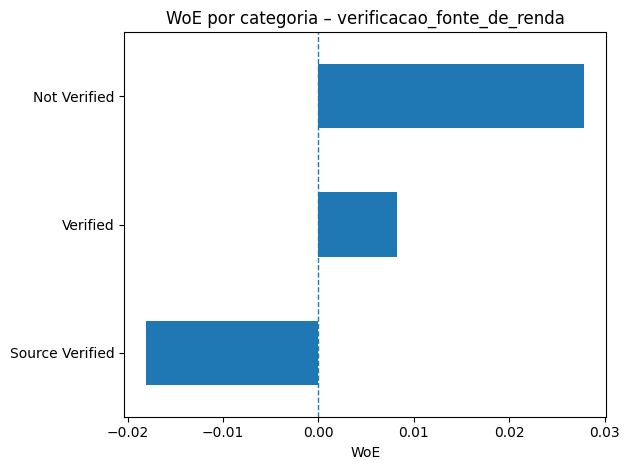

In [26]:
# 4. Visualizar WoE de uma feature
encoder.plot_woe('verificacao_fonte_de_renda')

In [27]:
# 5. Persistência
encoder.save('woe_encoder.pkl')

In [28]:
encoder.view_log()

{'qtd_restritivos': {0: 0.04892798105590979,
  1: -0.08860049421347437,
  2: -3.6418585954217595,
  3: -3.0824829323524208,
  4: -3.422334413431806},
 'verificacao_fonte_de_renda': {'Not Verified': 0.027837704794385305,
  'Source Verified': -0.018030395933120336,
  'Verified': 0.00826052496589308},
 'qtd_atrasos_ultimos_2a': {0: 0.08399230285346074,
  1: 0.09174012219603724,
  2: -0.979008217967101,
  3: -1.2139979987465952,
  4: -1.062093669545711,
  5: -1.0763923939458575,
  6: -1.1645888017664603,
  7: -1.1272256373540837,
  8: -0.9523947522892865},
 'qtd_consultas_ultimos_6m': {0: -7.365531365090996e-06,
  1: 0.00595288743585519,
  2: -0.01461572717936426,
  3: 0.08009058371801164,
  4: -0.35570946771023887,
  5: 0.14608674933635743}}

In [29]:
encoder.export_log_json('woe_maps.json')

In [31]:
# Carregar o encoder com os mapeamentos salvos
encoder_novo = WOEGuard.load_from_json(
    "woe_maps.json",
    drop_original=False,       # mesmo comportamento anterior
    suffix="_woe_novo",        # novo sufixo opcional
    default_woe=0.0            # WoE para categorias não vistas
)

# Aplicar a transformação
df_novo = pd.read_csv("./data/case_data_science_credit.csv", sep=";")
df_novo = criar_novas_features(df_novo)

df_transformado = encoder_novo.transform(df_novo)
display(df_transformado.head(3))

,client_id,qtd_restritivos,verificacao_fonte_de_renda,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,...,atrasos_por_linhas_credito_abertas,consultas_por_linha_aberta,consultas_por_emprestimo_tomado,diferenca_grade_subgrade,renda_presumida,fonte_renda_verificada,qtd_restritivos_woe_novo,verificacao_fonte_de_renda_woe_novo,qtd_atrasos_ultimos_2a_woe_novo,qtd_consultas_ultimos_6m_woe_novo
0,75521,0,Not Verified,16.284758,176346.62670,1,2.498291,0,0,13,...,0.071429,0.0,0.0,-4,614.071115,0,0.0,0.027838,0.0,0.0
1,28124,0,Source Verified,15.412409,39833.92100,0,2.377215,0,0,12,...,0.000000,0.0,0.0,-3,234.161944,0,0.0,-0.018030,0.0,0.0
2,8420,0,Source Verified,28.137619,91506.69105,0,4.316277,0,0,14,...,0.000000,0.0,0.0,11,1004.917985,0,0.0,-0.018030,0.0,0.0


In [ ]:
# ... carregando woe de arquivo pkl
loaded = WOEGuard.load('woe_encoder.pkl')

df_novo = pd.read_csv("./data/case_data_science_credit.csv", sep=";")
df_novo = criar_novas_features(df_novo)

df_transformado = loaded.transform(df_novo)
display(df_transformado.head(3))

,client_id,qtd_restritivos,verificacao_fonte_de_renda,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,...,atrasos_por_linhas_credito_abertas,consultas_por_linha_aberta,consultas_por_emprestimo_tomado,diferenca_grade_subgrade,renda_presumida,fonte_renda_verificada,qtd_restritivos_woe,verificacao_fonte_de_renda_woe,qtd_atrasos_ultimos_2a_woe,qtd_consultas_ultimos_6m_woe
0,75521,0,Not Verified,16.284758,176346.62670,1,2.498291,0,0,13,...,0.071429,0.0,0.0,-4,614.071115,0,0.048928,0.027838,0.091740,-0.000007
1,28124,0,Source Verified,15.412409,39833.92100,0,2.377215,0,0,12,...,0.000000,0.0,0.0,-3,234.161944,0,0.048928,-0.018030,0.083992,-0.000007
2,8420,0,Source Verified,28.137619,91506.69105,0,4.316277,0,0,14,...,0.000000,0.0,0.0,11,1004.917985,0,0.048928,-0.018030,0.083992,-0.000007
